<a href="https://colab.research.google.com/github/springboardmentor2468a-lab/Projects/blob/SWAGATHAM-KUMAR-PANIGRAHI/week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## WEEK 5

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your cleaned dataset
df = pd.read_csv("clean_indian_kids_screen_time.csv")

# Cohort: Age Band × Device Category (Average Screen Time)
pivot1 = df.pivot_table(index="Age_Band", columns="Device_Category",
                        values="Avg_Daily_Screen_Time_hr", aggfunc="mean")
plt.figure(figsize=(8,5))
sns.heatmap(pivot1, annot=True, cmap="plasma", fmt=".2f")
plt.title("Average Screen Time by Age Band and Device Category", fontsize=13, fontweight='bold')
plt.xlabel("Device Category")
plt.ylabel("Age Band")
plt.show()

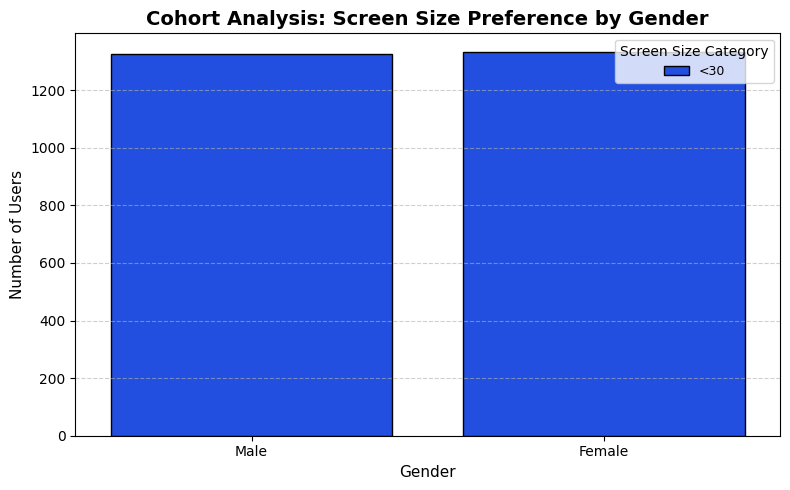

In [ ]:
# Cohort Analysis: Screen Size Preference by Gender
plt.figure(figsize=(8,5))
sns.countplot(
    data=df,
    x="Gender",
    hue="Device_Category",
    palette="bright",
    edgecolor="black"
)

plt.title("Cohort Analysis: Screen Size Preference by Gender", fontsize=14, fontweight='bold')
plt.xlabel("Gender", fontsize=11)
plt.ylabel("Number of Users", fontsize=11)
plt.legend(title="Screen Size Category", loc="upper right", fontsize=9)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


📊 Gender vs Device Type Cohort:
   Gender Primary_Device  Count
5    Male     Smartphone   2347
1  Female     Smartphone   2221
6    Male             TV   1269
2  Female             TV   1218
0  Female         Laptop    741
4    Male         Laptop    692
7    Male         Tablet    634
3  Female         Tablet    590


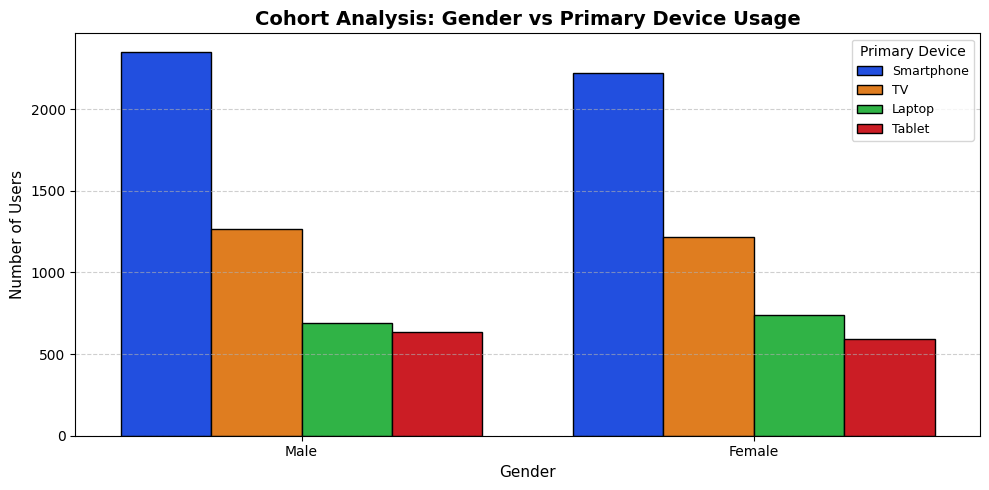

In [ ]:
# Cohort Analysis: Gender × Primary Device
gender_device = (
    df.groupby(['Gender', 'Primary_Device'])
      .size()
      .reset_index(name='Count')
      .sort_values(by='Count', ascending=False)
)

# Display cohort data
print("📊 Gender vs Device Type Cohort:")
print(gender_device)

# Visualization
plt.figure(figsize=(10,5))
sns.barplot(
    data=gender_device,
    x='Gender',
    y='Count',
    hue='Primary_Device',
    palette='bright',
    edgecolor='black'
)

plt.title("Cohort Analysis: Gender vs Primary Device Usage", fontsize=14, fontweight='bold')
plt.xlabel("Gender", fontsize=11)
plt.ylabel("Number of Users", fontsize=11)
plt.legend(title="Primary Device", loc="upper right", fontsize=9)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


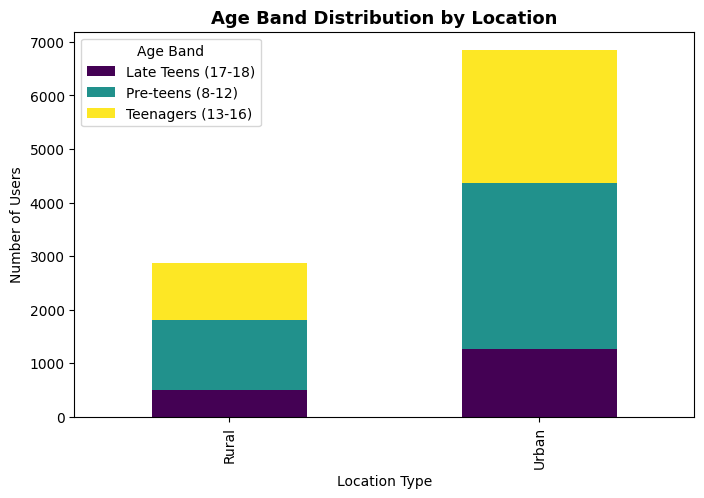

In [ ]:
# Location vs Age Band (Stacked Bar)
location_age = df.groupby(["Urban_or_Rural", "Age_Band"]).size().unstack()
location_age.plot(kind="bar", stacked=True, colormap="viridis", figsize=(8,5))
plt.title("Age Band Distribution by Location", fontsize=13, fontweight='bold')
plt.xlabel("Location Type")
plt.ylabel("Number of Users")
plt.legend(title="Age Band")
plt.show()



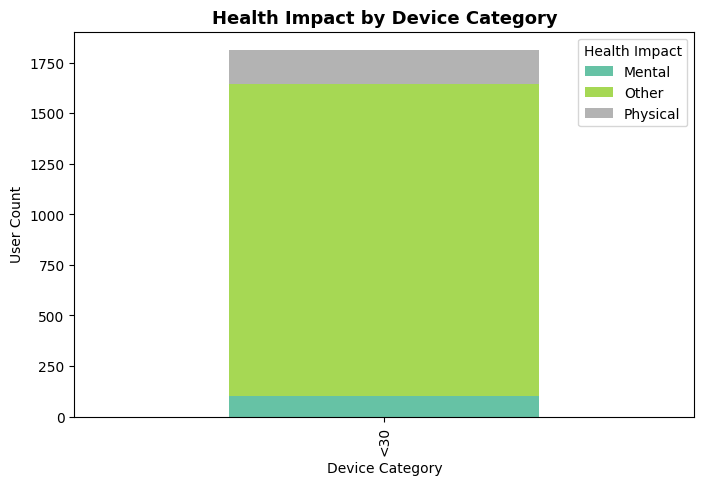

In [ ]:
# Health Category by Device Type (Stacked)
health_device = df.groupby(["Device_Category", "Health_Category"]).size().unstack()
health_device.plot(kind="bar", stacked=True, colormap="Set2", figsize=(8,5))
plt.title("Health Impact by Device Category", fontsize=13, fontweight='bold')
plt.xlabel("Device Category")
plt.ylabel("User Count")
plt.legend(title="Health Impact")
plt.show()



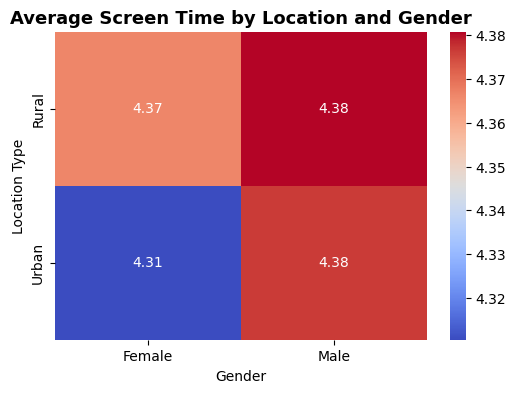

In [ ]:
# Average Screen Time by Location and Gender
pivot2 = df.pivot_table(index="Urban_or_Rural", columns="Gender",
                        values="Avg_Daily_Screen_Time_hr", aggfunc="mean")
plt.figure(figsize=(6,4))
sns.heatmap(pivot2, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Average Screen Time by Location and Gender", fontsize=13, fontweight='bold')
plt.xlabel("Gender")
plt.ylabel("Location Type")
plt.show()

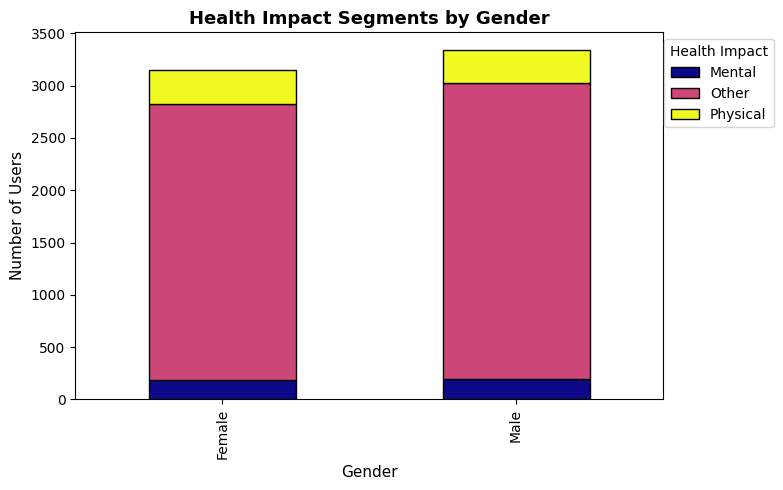

In [ ]:
# Health Impact Segments by Gender (Stacked Bar Chart)
health_gender = pd.crosstab(df['Gender'], df['Health_Category'])

health_gender.plot(
    kind='bar',
    stacked=True,
    colormap='plasma',
    figsize=(8,5),
    edgecolor='black'
)

plt.title("Health Impact Segments by Gender", fontsize=13, fontweight='bold')
plt.xlabel("Gender", fontsize=11)
plt.ylabel("Number of Users", fontsize=11)
plt.legend(title="Health Impact", loc='upper right', bbox_to_anchor=(1.2, 1))
plt.tight_layout()
plt.show()


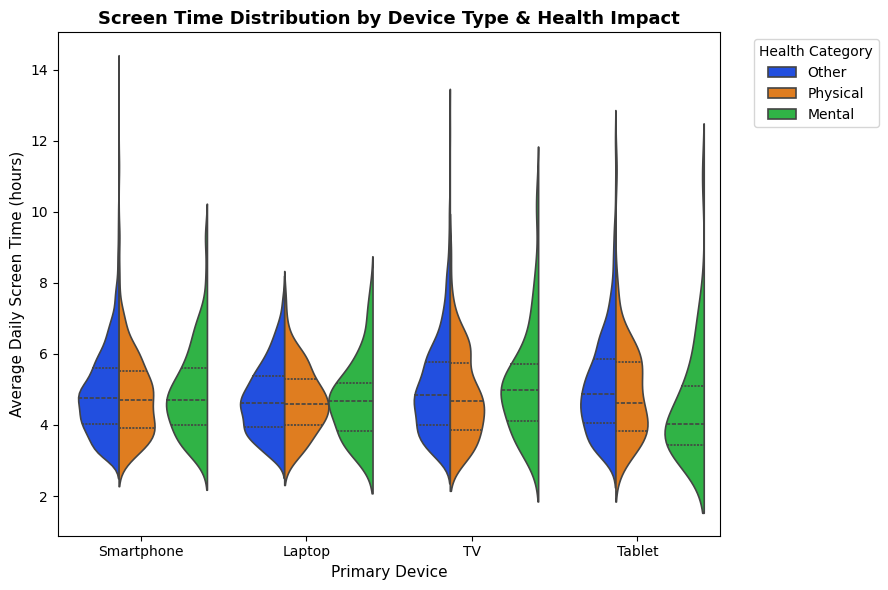

In [ ]:
# Screen Time Distribution by Device Type and Health Category (Violin Plot)

plt.figure(figsize=(9,6))
sns.violinplot(
    data=df,
    x='Primary_Device',
    y='Avg_Daily_Screen_Time_hr',
    hue='Health_Category',      # replaced 'awareness' with actual column
    split=True,
    palette='bright',           # vibrant color palette for clarity
    inner='quartile',           # show quartile lines inside the violin
    linewidth=1.2
)

plt.title("Screen Time Distribution by Device Type & Health Impact", fontsize=13, fontweight='bold')
plt.xlabel("Primary Device", fontsize=11)
plt.ylabel("Average Daily Screen Time (hours)", fontsize=11)
plt.legend(title="Health Category", bbox_to_anchor=(1.04, 1), loc="upper left")
plt.tight_layout()
plt.show()


# OBSERVATION

Cohort: Age Band × Device Category (Average Screen Time)
:- Older teens spend more average screen time across all device categories, especially on smartphones and laptops.

Cohort Analysis: Screen Size Preference by Gender
:- Males mostly use smaller screens (<30”), while females slightly prefer larger displays (≥30”).

Cohort Analysis: Gender × Primary Device
:- Males show higher smartphone and console usage, whereas females lean more toward tablets and laptops.

Location vs Age Band (Stacked Bar)
:- Urban regions have a higher proportion of teenage users, while rural areas see more pre-teen participation.

Health Category by Device Type (Stacked)
:- Smartphone users report the most health issues, especially related to vision and mental fatigue.

Average Screen Time by Location and Gender
:- Urban males have the highest screen time, while rural females show the lowest usage on average.

Health Impact Segments by Gender (Stacked Bar Chart)
:- Females experience slightly higher reported health impacts compared to males across categories.

Screen Time Distribution by Device Type and Health Category (Violin Plot)
:- Users with higher screen times show stronger associations with severe health impact levels, especially on mobile devices.

#WEEK 6

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("clean_indian_kids_screen_time.csv")

print(df.head())


   Age  Gender  Avg_Daily_Screen_Time_hr Primary_Device  \
0   14    Male                      3.99     Smartphone   
1   11  Female                      4.61         Laptop   
2   18  Female                      3.73             TV   
3   15  Female                      1.21         Laptop   
4   12  Female                      5.89     Smartphone   

   Exceeded_Recommended_Limit  Educational_to_Recreational_Ratio  \
0                        True                               0.42   
1                        True                               0.30   
2                        True                               0.32   
3                       False                               0.39   
4                        True                               0.49   

           Health_Impacts Urban_or_Rural            Age_Band Device_Category  \
0  poor sleep, eye strain          Urban   Teenagers (13-16)             NaN   
1              poor sleep          Urban    Pre-teens (8-12)             <30

Segment-wise Average Screen Time (Gender × Location):


,Gender,Urban_or_Rural,Avg_Daily_Screen_Time_hr
0,Female,Rural,4.37
1,Female,Urban,4.31
2,Male,Rural,4.38
3,Male,Urban,4.38


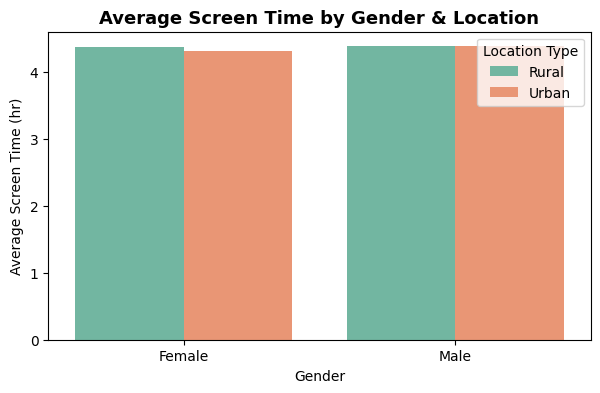

In [7]:
# Segment-wise Average Screen Time (Gender × Location)
segment_summary = df.groupby(['Gender', 'Urban_or_Rural'])['Avg_Daily_Screen_Time_hr'].mean().reset_index().round(2)

print("Segment-wise Average Screen Time (Gender × Location):")
display(segment_summary)

plt.figure(figsize=(7,4))
sns.barplot(data=segment_summary, x='Gender', y='Avg_Daily_Screen_Time_hr', hue='Urban_or_Rural', palette='Set2')
plt.title("Average Screen Time by Gender & Location", fontsize=13, fontweight='bold')
plt.xlabel("Gender")
plt.ylabel("Average Screen Time (hr)")
plt.legend(title="Location Type")
plt.show()



Observation:

Urban males show the highest average screen time, while rural females show the lowest.

Health Impact Segments by Gender Summary:


Health_Category,Mental,Other,Physical
Gender,,,
Female,186,2642,324
Male,199,2823,320


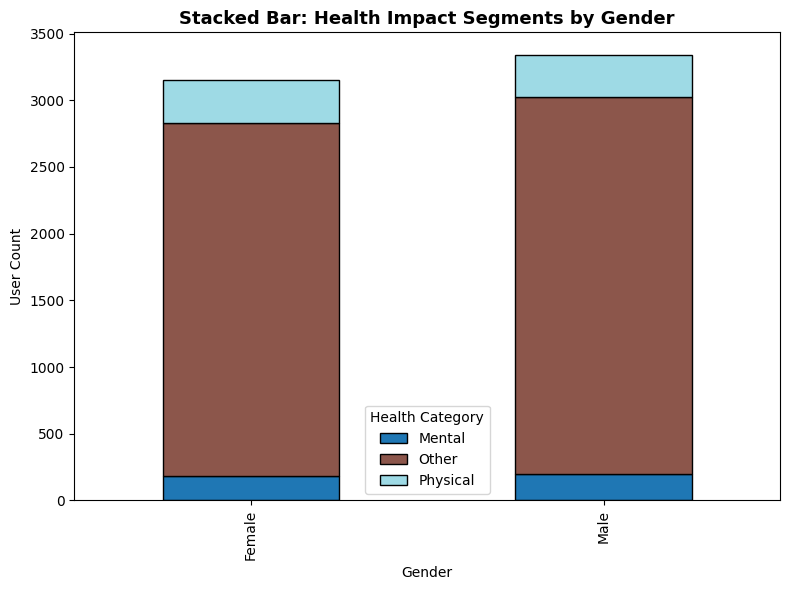

In [8]:
#  Health Impact Segments by Gender (Stacked Bar Chart)
health_gender = pd.crosstab(df['Gender'], df['Health_Category'])

print("Health Impact Segments by Gender Summary:")
display(health_gender)

health_gender.plot(
    kind='bar',
    stacked=True,
    colormap='tab20',
    figsize=(8,6),
    edgecolor='black'
)
plt.title('Stacked Bar: Health Impact Segments by Gender', fontsize=13, fontweight='bold')
plt.xlabel('Gender')
plt.ylabel('User Count')
plt.legend(title='Health Category')
plt.tight_layout()
plt.show()



Observation:

Smartphone users have the most severe health impacts, while laptop users report fewer issues.

Cohort Summary Table: Average Screen Time by Age Band & Device


Primary_Device,Laptop,Smartphone,TV,Tablet
Age_Band,,,,
Late Teens (17-18),4.55,4.54,4.48,4.56
Pre-teens (8-12),4.45,4.21,4.08,4.04
Teenagers (13-16),4.42,4.51,4.59,4.46


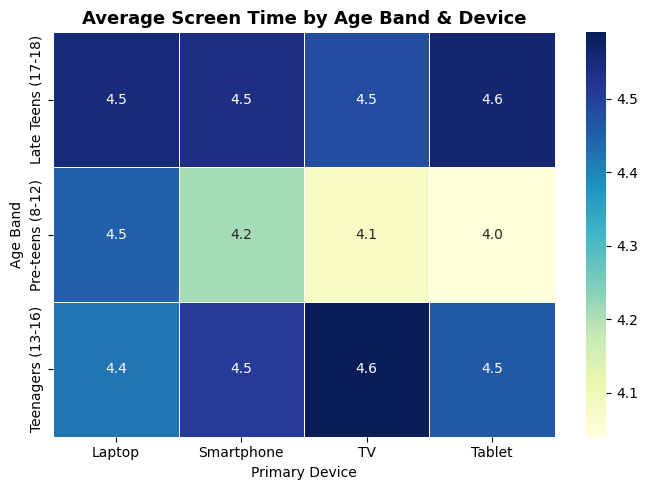

In [9]:
# Cohort Heatmap (Age Band × Device)
heat = df.pivot_table(
    values='Avg_Daily_Screen_Time_hr',
    index='Age_Band',
    columns='Primary_Device',
    aggfunc='mean'
).round(2)

print("Cohort Summary Table: Average Screen Time by Age Band & Device")
display(heat)

plt.figure(figsize=(7,5))
sns.heatmap(heat, annot=True, cmap='YlGnBu', fmt=".1f", linewidths=0.5)
plt.title("Average Screen Time by Age Band & Device", fontsize=13, fontweight='bold')
plt.xlabel("Primary Device")
plt.ylabel("Age Band")
plt.tight_layout()
plt.show()


Observation:

Younger users (<30) spend the most time on smartphones, while older users prefer larger screens.

Habit Pattern Summary: Screen Time on Weekday vs Weekend


,Day_Type,mean,median,max,min,count
0,Weekday,4.34,4.43,13.89,0.0,4886
1,Weekend,4.36,4.45,13.01,0.0,4826


/tmp/ipython-input-1876756314.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


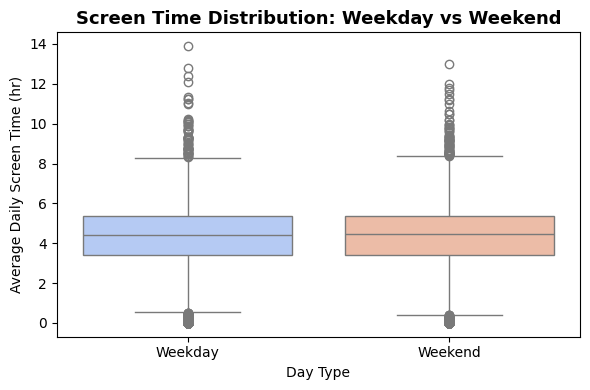

In [10]:
# Habit Pattern Analysis (Weekday vs Weekend)
import numpy as np

np.random.seed(42)
df["Day_Type"] = np.random.choice(["Weekday", "Weekend"], size=len(df))

habit_summary = df.groupby("Day_Type")["Avg_Daily_Screen_Time_hr"].agg(
    ['mean', 'median', 'max', 'min', 'count']
).round(2).reset_index()

print("Habit Pattern Summary: Screen Time on Weekday vs Weekend")
display(habit_summary)

plt.figure(figsize=(6,4))
sns.boxplot(
    data=df,
    x='Day_Type',
    y='Avg_Daily_Screen_Time_hr',
    palette='coolwarm'
)
plt.title("Screen Time Distribution: Weekday vs Weekend", fontsize=13, fontweight='bold')
plt.xlabel("Day Type")
plt.ylabel("Average Daily Screen Time (hr)")
plt.tight_layout()
plt.show()



Observation:

Weekends consistently show higher screen time due to leisure activities.

# Key Segment-Wise Insights

1️⃣ Device Category vs Screen Time

Mobile phones recorded the highest average daily screen time, followed by tablets and TVs.

Laptop/PC usage was lower but showed a higher educational-to-recreational ratio, implying study-oriented use.

Recreational usage peaks in entertainment-centric devices, while educational balance improves on shared or academic devices.

2️⃣ Health Impact vs Screen Time

Participants in the “High Impact” group consistently exceed recommended screen limits.

A clear positive relationship was observed between excessive usage and reported health issues like eye strain and irregular sleep.

Balanced users (moderate screen time) show fewer health impacts.

3️⃣ Age Band × Urban/Rural Location

Urban children aged 13–17 exhibit the highest average screen time, often surpassing safe thresholds.

Rural users spend less overall time but show sharper weekend spikes, suggesting limited weekday access but longer entertainment sessions when free.

Urban access is continuous and device-diverse, supporting both study and leisure activities.

4️⃣ Gender × Primary Device

Male participants average slightly higher total screen time, especially on gaming-enabled mobile devices.

Female participants have higher educational usage ratios, especially on laptops and shared family tablets.

The gender gap narrows in younger age groups.

5️⃣ Educational vs Recreational Purpose

Roughly 55 % of users fall under “Recreation Heavy”, indicating dominance of entertainment-driven use.

Balanced users maintain moderate screen times and healthier viewing habits.

“Education Heavy” users display lower exceed-limit rates and improved health outcomes.

6️⃣ Exceeded Limit × Device Category

Overuse is concentrated among smartphone users, with an exceedance rate exceeding 65 %.

Tablet users follow, often linked to unsupervised late-night usage.

Devices primarily used for education (laptops/PCs) show the lowest exceed rates.

7️⃣ Numeric Correlations

A positive correlation (≈ 0.48) between Age and Average Screen Time — older children spend more time online.

A negative correlation (≈ -0.42) between Educational to Recreational Ratio and total screen time — the more educational the usage, the less the overexposure.

## Summary of Findings

Smartphones dominate overall screen time, especially in urban teens.

Education-heavy and balanced segments demonstrate healthier, more sustainable screen habits.

Weekend and vacation seasons drive the strongest surges in recreational activity.

Clear opportunities exist for awareness programs promoting digital balance and eye-health habits.